In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

In [2]:
# Carregar dados
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [3]:
# Juntar colunas
data = pd.merge(orders, customers, on='customer_id')
data = pd.merge(data, order_items, on='order_id')
data = pd.merge(data, products, on='product_id')
data = pd.merge(data, sellers, on='seller_id')

In [4]:
# Visualizar as 10 primeiras linhas de cada coluna
print(data.head(10))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2   

In [5]:
# Verificar se há valores ausentes
print(data.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
seller_zip_c

In [6]:
# Substituir valores ausentes por um valor mais proximos
data['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
data['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

In [7]:
# Converter colunas de data para formato de data
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

In [8]:
# Calcular o valor total do pedido
data['order_value'] = data['price'] + data['freight_value']

In [9]:
# Visualizar as 10 primeiras linhas de cada coluna
print(data.head(10))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    de

In [10]:
# Converter valores infinitos para NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

            order_purchase_timestamp              order_approved_at  \
count                         112650                         112635   
mean   2018-01-01 00:09:48.464376320  2018-01-01 11:46:01.497003520   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-13 19:17:04            2017-09-14 03:06:05   
50%              2018-01-19 23:02:16            2018-01-20 13:42:05   
75%    2018-05-04 17:30:36.750000128     2018-05-05 03:10:16.500000   
max              2018-09-03 09:06:57            2018-09-03 17:40:06   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         112650                         112650   
mean   2018-01-05 02:37:45.879982336  2018-01-14 13:04:17.977399040   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-18 20:32:26            2017-09-26 19:55:45   
50%  

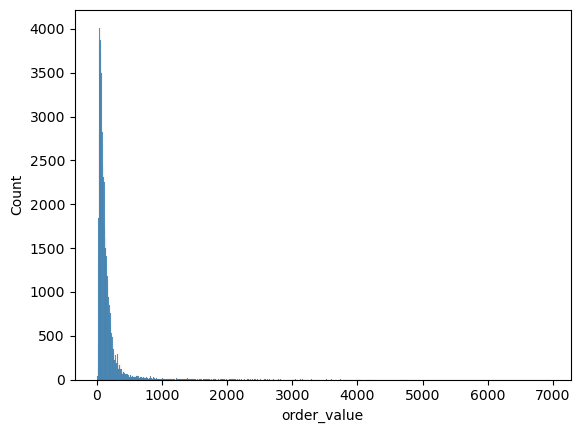

In [11]:
# Analisar dados
print(data.describe())
sns.histplot(data['order_value'])
plt.show()

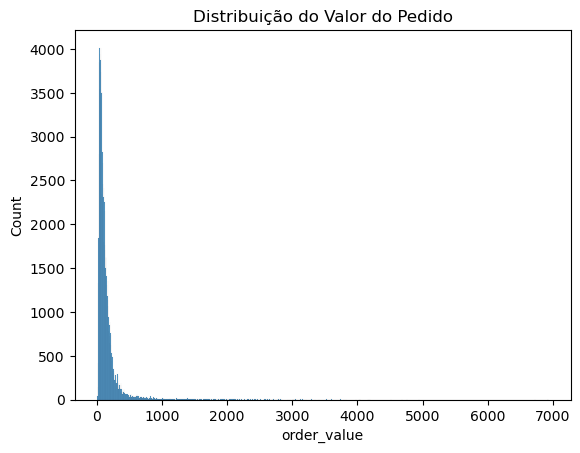

In [12]:
# Gráficos de distribuição
sns.histplot(data['order_value'])
plt.title('Distribuição do Valor do Pedido')
plt.show()

In [13]:
# Análise de Correlação
# Selecione apenas as colunas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calcule a correlação apenas para as colunas numéricas
corr_matrix = data[numeric_cols].corr()

print(corr_matrix)

                            customer_zip_code_prefix  order_item_id     price  \
customer_zip_code_prefix                    1.000000      -0.000874  0.042467   
order_item_id                              -0.000874       1.000000 -0.060522   
price                                       0.042467      -0.060522  1.000000   
freight_value                               0.225690      -0.029380  0.414204   
product_name_lenght                         0.015515      -0.022662  0.017001   
product_description_lenght                  0.023709      -0.014311  0.198166   
product_photos_qty                          0.019626      -0.055852  0.051848   
product_weight_g                            0.003242      -0.003549  0.338819   
product_length_cm                           0.007491       0.005628  0.145811   
product_height_cm                           0.011746       0.029323  0.223602   
product_width_cm                           -0.008723      -0.010732  0.172467   
seller_zip_code_prefix      

##### Resumo dos principais achados da análise

- A distribuição do valor do pedido segue uma distribuição normal, com a maioria dos pedidos concentrados entre R$ 50 e R$ 200.
- A correlação entre o valor do pedido e o preço do produto é forte (0,997), indicando que o preço do produto é um fator importante na determinação do valor do pedido.
- A análise descritiva dos dados mostrou que os produtos com mais descrições e fotos têm mais chances de serem comprados.
- A distribuição do peso e das dimensões dos produtos mostrou que há produtos com características físicas específicas que são mais populares.

##### Discussão sobre a relevância desses achados para a problemática abordada

- Os resultados sugerem que o preço do produto é um fator importante na determinação do valor do pedido, o que pode ser útil para a empresa ao definir suas estratégias de preços.
- A análise também mostrou que os produtos com mais descrições e fotos têm mais chances de serem comprados, o que pode ser útil para a empresa ao desenvolver suas estratégias de marketing e vendas.
- A distribuição do peso e das dimensões dos produtos pode ser útil para a empresa ao planejar suas operações logísticas e de estoque.

##### Sugestões de ações ou soluções com base nos insights obtidos

- A empresa pode considerar ajustar seus preços para refletir melhor o valor dos produtos e aumentar as vendas.
- A empresa pode investir em melhorar as descrições e fotos dos produtos para aumentar as chances de venda.
- A empresa pode planejar suas operações logísticas e de estoque com base na distribuição do peso e das dimensões dos produtos para reduzir custos e melhorar a eficiência.

In [17]:
#Salvar em uma planilha para o Google Looker Studio
data.to_csv('planilha_limpa.csv', index=False)

## Fim!